In [1]:
""" import useful functions """

# Generic
import pandas as pd
import numpy as np
import scipy
from itertools import islice, cycle
import math
import os
import sys
from scipy.integrate import odeint
from joblib import Parallel, delayed
import itertools
from importlib import reload
from functools import lru_cache
import scipy.integrate

# cosmology
import pyccl as ccl
from astropy.io import fits
import yaml
import sacc
import time

"""
# covariance - Charlie's version of TJPCov
MODULE_PATH = "/home/c2042999/TJPCov/tjpcov/__init__.py"
MODULE_NAME = "tjpcov"
import importlib
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)
from tjpcov.covariance_calculator import CovarianceCalculator
"""

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# SRD Binning
import srd_redshift_distributions as srd
import binning

# Data Visualization
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.patches as mpatches
#import seaborn as sns

# MCMC
import emcee
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import corner
from chainconsumer import ChainConsumer, Chain, make_sample
from IPython.display import display, Math
from multiprocessing import Pool
from tqdm import tqdm

# nDGP NL and lin Pk
from nDGPemu import BoostPredictor

# MGCAMB
MODULE_PATH = "/home/c2042999/MGCAMB/camb/__init__.py"
MODULE_NAME = "MGCAMB"
import importlib
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)
from MGCAMB import camb

# f(R) emu (eMANTIS)
from emantis import FofrBoost

In [5]:
from Likelihood_PCADR import *

In [3]:
cosmo_universe = ccl.Cosmology(Omega_c = 0.27, 
                          Omega_b = 0.046, 
                          h = 0.7, 
                          n_s = 0.974,
                          A_s = 2.01e-9)

cosmo_universe_linear = ccl.Cosmology(Omega_c = 0.27, 
                          Omega_b = 0.046, 
                          h = 0.7, 
                          n_s = 0.974,
                          A_s = 2.01e-9,
                          matter_power_spectrum='linear')


fR_universe = 1e-4
H0rc_universe = 0.0
MGParam_universe = [H0rc_universe,fR_universe,1,0,0]

In [13]:
print(cosmo_universe["Omega_c"])

0.27


In [17]:
#### Run to get the data and covariance (with scale cuts) to put into the likelihood function
command = 'python Get_Data_3x2pt_fsigma8_MG.py --OmgC {} --OmgB {} --h {} --ns {} --As {} --gravity_flag "f(R)" --MG_param {}'.format(cosmo_universe["Omega_c"],cosmo_universe["Omega_b"],cosmo_universe["h"], cosmo_universe["n_s"],cosmo_universe["A_s"],fR_universe)
os.system(command)


/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/nDGPemu/emulator.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream
/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/nDGPemu/emulator.py:43: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self.model = joblib.load(resource_stream('nDGPemu','/cache/nDGPemu_LC_k5_woSN_PCA3_z2.joblib'))
/home/c2042999/PCA_env/3.8.1

Loading model and related data
Training the emulator at aexp=0.3333... done.
Training the emulator at aexp=0.3650... done.
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... 

Traceback (most recent call last):
  File "/home/c2042999/PCA_project/Likelihood_estimation_3x2pt_fsigma8/Get_Data_3x2pt_fsigma8_MG.py", line 493, in <module>
  File "/home/c2042999/PCA_project/Likelihood_estimation_3x2pt_fsigma8/Get_Data_3x2pt_fsigma8_MG.py", line 220, in main
    Get_Pk2D_obj(cosmo_universe, MGParam_universe, linear=False, gravity_model=gravity_flag),tracer1_type="k", tracer2_type="k")
  File "/home/c2042999/PCA_project/Likelihood_estimation_3x2pt_fsigma8/Likelihood_PCADR.py", line 777, in Get_Pk2D_obj
    return ccl.pk2d.Pk2D.from_function(pkfunc=pk_func, is_logp=False)
  File "/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/pyccl/pk2d.py", line 124, in from_function
    pk_arr = np.array([pkfunc(k=np.exp(lk_arr), a=a) for a in a_arr])
  File "/home/c2042999/PCA_env/3.8.10/lib/python3.10/site-packages/pyccl/pk2d.py", line 124, in <listcomp>
    pk_arr = np.array([pkfunc(k=np.exp(lk_arr), a=a) for a in a_arr])
  File "/home/c2042999/PCA_project/Likelihood_

2

In [18]:
### Load and collect the data for likelihood
npzfile = np.load("Data_storage.npz")

C_ell_data_mock = [npzfile['C_ell_data'],npzfile['ell_data'],npzfile['z'],npzfile['Binned_distribution_source'],\
                    npzfile['Binned_distribution_lens'],20,1478.5,13]

Data_fsigma8= [npzfile['z_eff_fsigma8'], npzfile['fsigma8_data'],np.matrix(npzfile['invcov_fsigma8'])]

L_choleski_inv = np.matrix(npzfile['L_ch_inv'])

gauss_invcov_rotated = np.matrix(npzfile['Inverse_cov'])

/tmp/ipykernel_2804749/600680827.py:7: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  Data_fsigma8= [npzfile['z_eff_fsigma8'], npzfile['fsigma8_data'],np.matrix(npzfile['invcov_fsigma8'])]
/tmp/ipykernel_2804749/600680827.py:9: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  L_choleski_inv = np.matrix(npzfile['L_ch_inv'])
/tmp/ipykernel_2804749/600680827.py:11: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular n

## Plot to check data/covariance

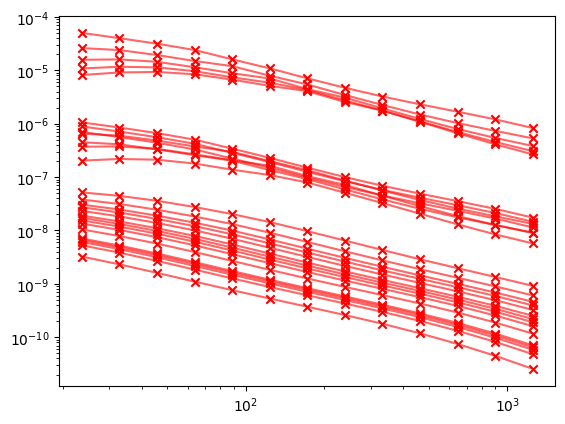

In [11]:
## Plot to check 3x2pt data

plt.scatter(C_ell_data_mock[1],C_ell_data_mock[0], color="r", marker='x')

for j in range(27):
    plt.plot(C_ell_data_mock[1][j*13:(j+1)*13], C_ell_data_mock[0][j*13:(j+1)*13], "r", alpha=0.6)

plt.xscale("log")
plt.yscale("log")

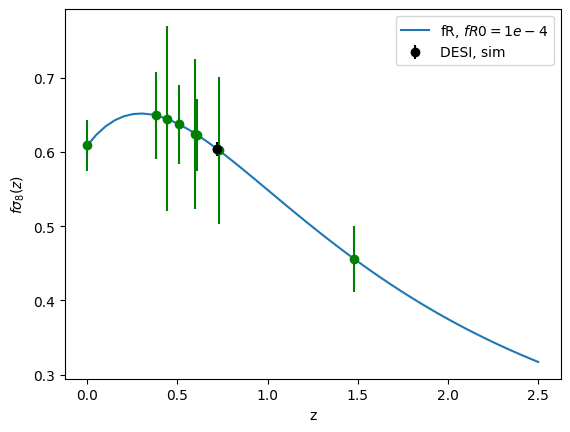

In [32]:
## Plot to check fsigma8 data

plt.plot(np.linspace(0.0, 2.5, 50), fsigma8_fR(cosmo_universe, MGParam_universe, 1/(np.linspace(0.0, 2.5, 50)+1)), label=r"fR, $fR0 = 1e-4$")
#plt.errorbar(Data_fsigma8[0][:-1], fsigma_8_realdata, yerr=fsigma_8_realdata*fsigma_8_fracerror[:-1], fmt="o", color="r")
plt.errorbar(Data_fsigma8[0], Data_fsigma8[1], yerr=np.sqrt(np.diag(np.linalg.inv(Data_fsigma8[2]))), fmt="o", color="g")
plt.errorbar(Data_fsigma8[0][-1], Data_fsigma8[1][-1], yerr=np.sqrt(np.diag(np.linalg.inv(Data_fsigma8[2])))[-1], fmt="o", color="k", label = "DESI, sim")

plt.xlabel("z")
plt.ylabel(r"$f \sigma_8(z)$")
plt.legend()

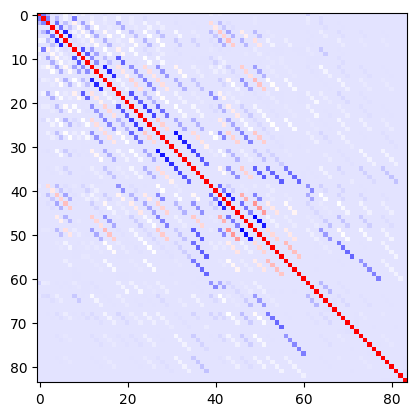

In [33]:
## Plot to check covariance (scale cuts)
cut_1 = gauss_invcov_cut[~np.all(gauss_invcov_cut == 0, axis=1)]
plt.imshow(cov2corr(cut_1[:,~np.all(cut_1 == 0, axis=0)]), origin='upper',  cmap='bwr')


(351, 351)


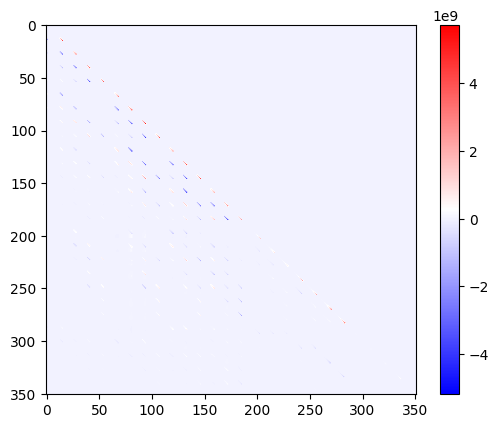

In [34]:
## Plot to choleski matrix (scale cuts)

print(L_choleski_inv.shape)
plt.imshow((L_choleski_inv), origin='upper',  cmap='bwr')

plt.colorbar()
plt.show()

(351, 351)


/home/c2042999/PCA_project/Likelihood_3x2pt_fsigma8_fR/Likelihood_PCADR.py:1441: RuntimeWarning: invalid value encountered in divide


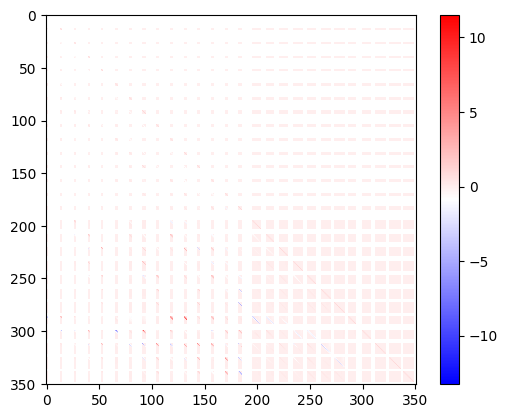

In [35]:
print(L_choleski_inv.shape)
plt.imshow(cov2corr(L_choleski_inv), origin='upper',  cmap='bwr')

plt.colorbar()
plt.show()

## Run Chains

In [ ]:
print(loglikelihood(C_ell_data_mock, cosmo_universe, cosmo_universe_linear, [0.2 , 1e-4 , 1.0 , 0.0147,0.0],L_choleski_inv , Bias_distribution_fiducial, Data_fsigma8))


In [ ]:
def log_likelihood(theta, Data, L_ch, L_ch_inv,Data_fsigma8):
    Omega_c, mu0,Sigma0, A_s1e9, h, n_s, wb, b1, b2, b3, b4, b5 = theta
    Bias_distribution = np.array([b1*np.ones(len(z)),
                             b2*np.ones(len(z)),
                             b3*np.ones(len(z)),
                             b4*np.ones(len(z)),
                             b5*np.ones(len(z))])
    #h = cosmo_universe["h"]
    #A_s = cosmo_universe["A_s"]
    A_s = A_s1e9*1e-9
    #n_s = cosmo_universe["n_s"]
    MGparams = [0.2,1e-4,1.0,mu0,Sigma0]

    cosmo = ccl.Cosmology(Omega_c = Omega_c, 
                      Omega_b = wb/h**2,
                      h = h,
                      n_s = n_s,
                      A_s = A_s)
    
    cosmo_linear = ccl.Cosmology(Omega_c = Omega_c, 
                      Omega_b = wb/h**2,
                      h = h,
                      n_s = n_s,
                      A_s = A_s,
                      matter_power_spectrum='linear')

    return loglikelihood(Data, cosmo,cosmo_linear, MGparams,  L_ch, L_ch_inv,Bias_distribution,Data_fsigma8)

In [ ]:
#### Get Planck priors #####

In [ ]:
sampler_Planck_arr = np.load("/home/c2042999/PCA_project/Prior_Planck_arr.npy")

In [ ]:
fig, ax = plt.subplots(len(sampler_Planck_arr.T), sharex=True)
labels = [ r"$n_s$", r"$w_b$"]

for i in range(len(sampler_Planck_arr.T)):
    ax[i].plot(sampler_Planck_arr[:,i], color = "black")
    ax[i].set_ylabel(labels[i])

In [ ]:
burnin = 0
ndim = len(labels)

cov_prior = np.cov(sampler_Planck_arr.T)
"""
mu_prior = []
for i in range(ndim):
    mcmc = np.percentile(sampler_Planck_arr[:, i], [16, 50, 84])
    mu_prior.append(mcmc[1])
"""
mu_prior = [cosmo_universe['n_s'], cosmo_universe["Omega_b"]*cosmo_universe["h"]**2]

In [ ]:
#### CHECK SUFFICIENTLY GAUSSIAN ####
df = pd.DataFrame(sampler_Planck_arr, columns=labels, index=np.arange(0,len(sampler_Planck_arr)))

chain2 = Chain.from_covariance(
    mu_prior, cov_prior,
    plot_contour=True, columns=labels, 
    color='blue', name=r'from covariance, our mean', 
    linewidth=1, linestyle='-'
)

c = ChainConsumer()
c.add_chain(Chain(samples=df, color="r", name="from chains"))
c.add_chain(chain2)
fig = c.plotter.plot(figsize = 0.5)

In [ ]:
def log_prior(theta):
    Omega_c, mu0,Sigma0, A_s1e9, h, n_s, wb, b1, b2, b3, b4, b5 = theta 

    #flat priors
    if not (0.28 < Omega_c + wb/h**2 < 0.36 and -2.0 < mu0 < 0.95 and -2.0 < Sigma0 < 0.95 and mu0 <= 2*Sigma0 + 1.0 \
            and 1.7 < A_s1e9 < 2.5 and 0.92 < n_s < 1 and 0.61 < h < 0.73 and 0.04 < wb/h**2 < 0.06 \
           and 0.8 < b1 < 3.0 and 0.8 < b2 < 3.0 and 0.8 < b3 < 3.0 and 0.8 < b4 < 3.0 and 0.8 < b5 < 3.0):
        return -np.inf
        
    gauss_funct = scipy.stats.multivariate_normal(mu_prior, cov_prior)
    
    return gauss_funct.logpdf([n_s, wb])

In [ ]:
def log_probability(theta, Data,  L_ch, L_ch_inv,Data_fsigma8):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, Data,  L_ch, L_ch_inv,Data_fsigma8)

In [ ]:
#MCMC method

# initializing the walkers in a tiny Gaussian ball around the maximum likelihood result
#and then run 10,000 steps of MCMC
Omega_c_est = 0.27
h_est = 0.7
A_s1e9_est = 2.1
n_s_est = 0.94
mu0_est = 0.1
Sigma0_est = 0.05
wb_est = 0.0223
b1_est = Bias_distribution_fiducial[0][0]
b2_est = Bias_distribution_fiducial[1][0]
b3_est = Bias_distribution_fiducial[2][0]
b4_est = Bias_distribution_fiducial[3][0]
b5_est = Bias_distribution_fiducial[4][0]

pos = [Omega_c_est, mu0_est,Sigma0_est, A_s1e9_est, h_est, n_s_est, wb_est,b1_est,b2_est,b3_est,b4_est,b5_est] \
+ np.append(np.append(1e-3 * np.random.randn(25, 5), 1e-5*np.random.randn(25, 2), axis = 1), \
            1e-3 * np.random.randn(25, 5), axis = 1)
nwalkers, ndim = pos.shape

# Set up the backend
# Don't forget to clear it in case the file already exists
filename = "tutorial.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler_PCA = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(C_ell_data_mock, L_choleski, L_choleski_inv,Data_fsigma8), backend = backend
)

sampler_PCA.run_mcmc(pos, 3000,store = True, progress=True);